In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("/content/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [14]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [15]:
df.drop_duplicates(inplace=True)

# Convert Date into proper format
df['Date'] = pd.to_datetime(df['Date'])

df.rename(columns={
    "Estimated Unemployment Rate (%)": "Unemployment_Rate",
    "Estimated Employed": "Employed",
    "Estimated Labour Participation Rate (%)": "Labour_Participation_Rate"
}, inplace=True)

/tmp/ipython-input-2445081844.py:4: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


**Unemployment Rate Distribution**

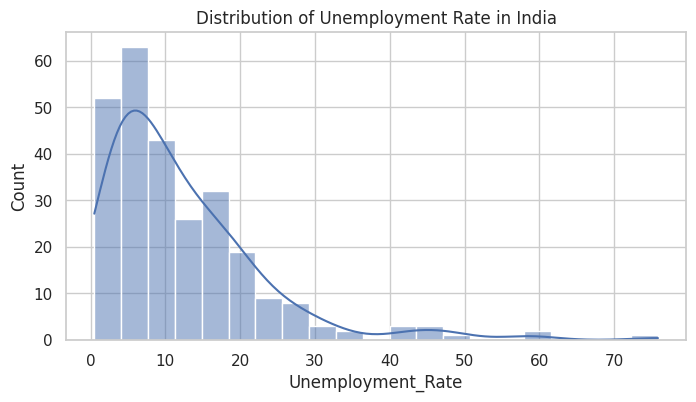

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['Unemployment_Rate'], kde=True)
plt.title("Distribution of Unemployment Rate in India")
plt.show()

**State-wise Average Unemployment**

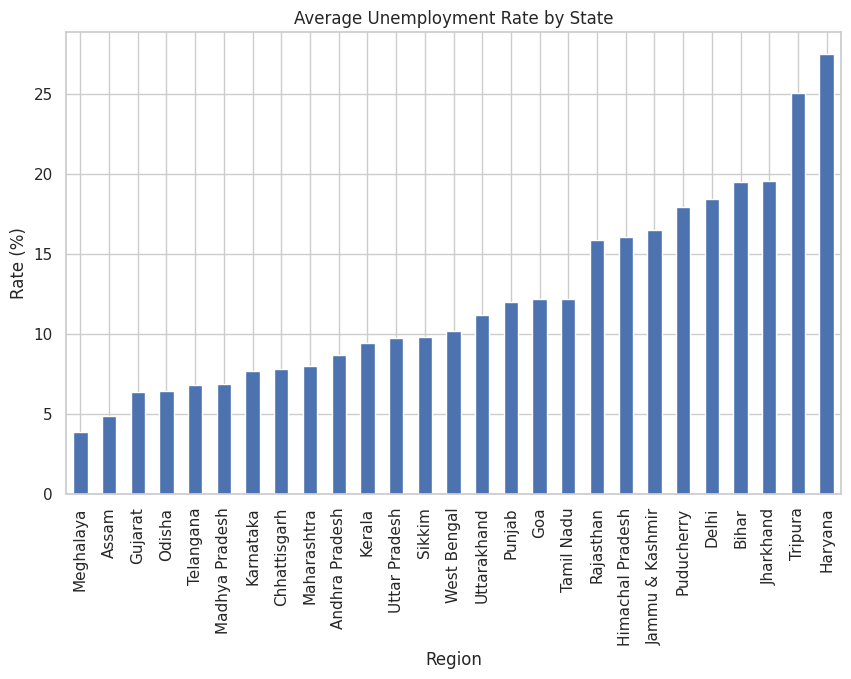

In [17]:
statewise = df.groupby('Region')['Unemployment_Rate'].mean().sort_values()

plt.figure(figsize=(10,6))
statewise.plot(kind='bar')
plt.title("Average Unemployment Rate by State")
plt.ylabel("Rate (%)")
plt.show()

**Trend Over Time**

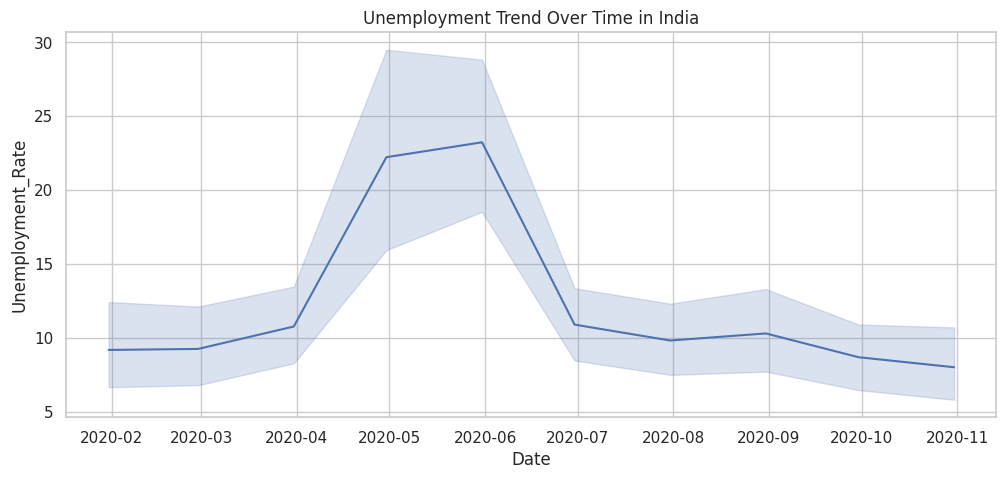

In [18]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate')
plt.title("Unemployment Trend Over Time in India")
plt.show()

**Labour Participation vs Unemployment**

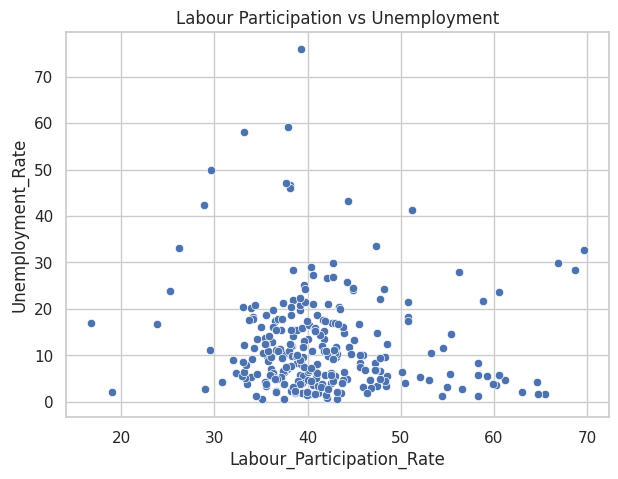

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Labour_Participation_Rate', y='Unemployment_Rate')
plt.title("Labour Participation vs Unemployment")
plt.show()

- The unemployment rate was highest during the COVID-19 months (2020).

- Some regions consistently show higher unemployment compared to others.

- States with higher labor participation usually show lower unemployment.

- Data shows clear seasonal and economic fluctuations across the months.
